<a href="https://colab.research.google.com/github/LandonW0227/COMP-3800-Project-1/blob/main/LandonWalkerProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Landon Walker Project 2 - Breast Cancer Tumor Analysis

GitHub Repository Link: https://github.com/LandonW0227/COMP-3800-Project-1

Link to GitHub profile: https://github.com/LandonW0227

Dataset: https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set

Description: This dataset contains information from a study done in the state of Wisconsin on the attributes of a various tumors within patients that have the potential to be breast cancer. It has a series of variables, each of which is a piece of information about a tumor that was found inside an individual. These variables can be analyzed to determine which is the most effective at predicting whether a tumor is malignant or not.

Target Variable: Classes (Benign or Malignant)

Prediction Goal: Find the variable that best predicts when an individual is diagnosed correctly with a malignant tumor.

In [87]:
#Uploading file into Google Colab along with needed libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
from sklearn import svm, datasets
uploaded = files.upload()

Saving Breast_Cancer_Wisconsin_Data.csv to Breast_Cancer_Wisconsin_Data (5).csv


In [88]:
#Importing matplotlib and reading the CSV file to ensure that it was imported correctly
from matplotlib import pyplot as plt
df = pd.read_csv('Breast_Cancer_Wisconsin_Data.csv')
print(df.head(10))

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   
5             1017122                8                       10   
6             1018099                1                        1   
7             1018561                2                        1   
8             1033078                2                        1   
9             1033078                4                        2   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                        

In [89]:
#Overview of the dataset
print("shape", df.shape)
print("Column Headers\n", df.columns.tolist())
print(df.dtypes)
print(df.head(10))
print(df.tail(10))
print(df.info)

shape (699, 11)
Column Headers
 ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6        

In [90]:
#Dropping the 'Sample code number' and 'Bare Nuclei' columns
df.drop(["Sample code number"], inplace=True, axis=1)
df.drop(["Bare Nuclei"], inplace=True, axis=1)
print(df.shape)
#Checking for null values
print(df.isnull().sum())
#Checking for duplicates
print(df.duplicated().sum())
#Duplicates are ok in this case

(699, 9)
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64
258


Explanation:

This is basic data cleaning. Unneeded columns were dropped, and null values were checked for. Also, duplicated values were checked for, but they can be allowed in this case because of the specifics of the dataset.

In [91]:
#Removing rows with null values
df.dropna(axis=0, inplace=True)
print(df.isnull().sum())
#Changing the Target variable numbers from [2,4] to [0,1]
df.loc[df['Class'] == 2, 'Class'] = 0
df.loc[df['Class'] == 4, 'Class'] = 1
print(df.head(10))

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   
5                8                       10                        10   
6                1                        1                         1   
7                2                        1                         2   
8                2               

In [92]:
#Importing more needed libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score
#Running value_counts on all of the columns in the data set
for column in df:
  print(df[column].value_counts())

Clump Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity of Cell Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity of Cell Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single Epithelial Cell Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bland Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: count, dtype: int64
Normal Nucleoli
1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
N

Explanation:

According to the column value counts, the target variable is not balanced. Because of this, the data will need to be balanced before any modeling is done.

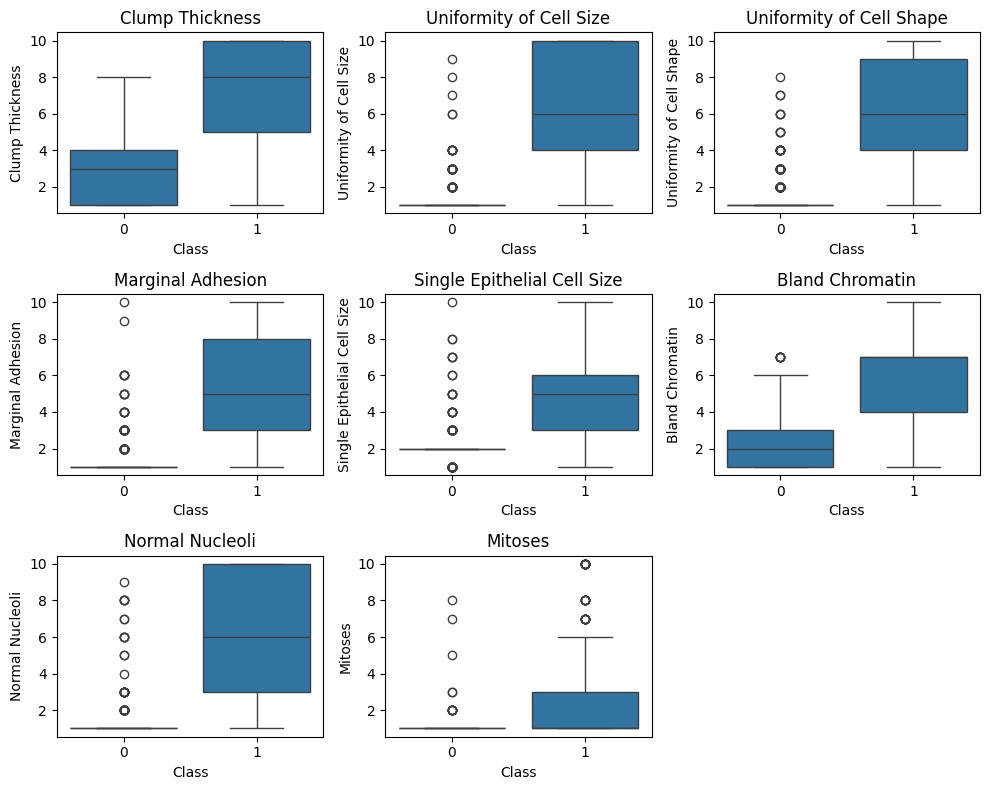

In [93]:
#Creating boxplots for all numerical features
num_list = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
fig = plt.figure(figsize=(10, 8))
for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(3,3,i+1)
    sns.boxplot(x='Class',y=column, data=df)
    sub.set_title(column)
fig.tight_layout()

In [94]:
#Generating the variance scores and p-values for all numerical features
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df.loc[:, ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
y = df.loc[:, 'Class']
fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)    # Prints out the scores
print(bestFeatures.pvalues_)  # Prints out the p-values
print(df.corr()) #Correlation coefficients

[ 733.20697841 1408.52721279 1419.30553012  657.79369959  608.71955539
  933.28729668  717.62804135  152.04023895]
[0. 0. 0. 0. 0. 0. 0. 0.]
                             Clump Thickness  Uniformity of Cell Size  \
Clump Thickness                     1.000000                 0.644913   
Uniformity of Cell Size             0.644913                 1.000000   
Uniformity of Cell Shape            0.654589                 0.906882   
Marginal Adhesion                   0.486356                 0.705582   
Single Epithelial Cell Size         0.521816                 0.751799   
Bland Chromatin                     0.558428                 0.755721   
Normal Nucleoli                     0.535835                 0.722865   
Mitoses                             0.350034                 0.458693   
Class                               0.716001                 0.817904   

                             Uniformity of Cell Shape  Marginal Adhesion  \
Clump Thickness                              0.65458

Explanation:

The ANOVA (Analysis of Variance) test is used to find variables that have little variance between the classes for the target. These variables are irrelevant to the target variable and should be removed from the dataset before any modeling is done. The f-score is used to determine if there are significant differences between the means of groups. A larger f-score indicates a larger difference between the group means. The p-value determines whether the observed differences in means are statistically significant. A smaller p-value indicates that the observed f-value is less likely to occur under the null hypothesis. In this case, all of the features have p-value of 0.0, and because of this, most of the f-scores are particularly high as well.

In [95]:
#Dropping the 'Mitoses' column
df.drop(["Mitoses"], inplace=True, axis=1)
print(df.shape)

(699, 8)


Explanation:

The "Mitoses" column had the smallest F-Score by a significant margin, so it does not need to be used in any modeling that is done.

In [96]:
#Splitting the data into 80% training and 20% testing
x = df.loc[:, df.columns!='Class']
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(559, 7) (559,) (140, 7) (140,)


Explanation:

Splitting the data in this case was necessary to avoid overfitting. This allows the model to evaluate the dataset more completely.

In [97]:
#Balancing the training data using oversampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
#Fit predictor and target variable
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)
print(x_train.shape)
print(oversampled_x.shape)

(559, 7)
(732, 7)


Explanation:

The data needs to be balanced in this case because the raw data itself is slighty imbalanced. In this case, oversampling was used because one class has a significantly smaller amount of data points than the other. This is done to allow the Logistic Regression Model better represent the dataset as a whole.

In [98]:
#Building a Logistic Regression Model using the data set
LogRegression = LogisticRegression(penalty=None, max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())
#Evaluating the accuracy of the model
test_pred = LogRegression.predict(x_test)
print('Accuracy Score: ' + str(accuracy_score(y_test, test_pred)))
print('Precision Score: ' + str(precision_score(y_test, test_pred, pos_label=1)))
print('Recall Score: ' + str(recall_score(y_test, test_pred, pos_label=1)))
print('F1 Score: ' + str(f1_score(y_test, test_pred, pos_label=1)))

Accuracy Score: 0.9642857142857143
Precision Score: 0.9056603773584906
Recall Score: 1.0
F1 Score: 0.9504950495049505


Explanation:

The data above comes from the Logistic Regression Model that was built using this dataset. The accuracy score of 0.964 is quite high for this type of model, However, it is not the best statistic to use to measure the effectiveness of the model because the model is imbalanced. In this case, the F1 Score is probably the best measure to use, and because the value is 0.950, the model can be seen as a good fit for the data. Additionally, the Precision and Recall scores are high as well, meaning that the model does predict many false negatives.

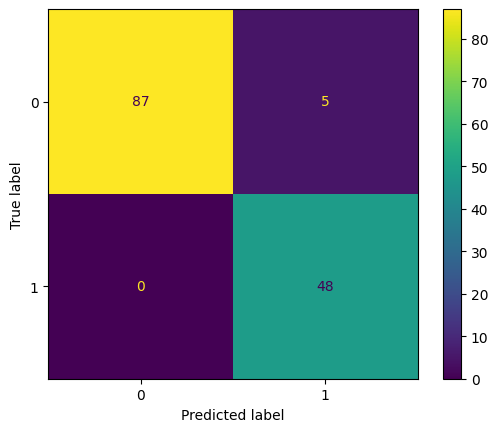

In [99]:
#Generating the Confusion Matrix of the Logistic Regression Model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

In [100]:
#Using MinMaxScaler for Normalization of data
#Using two features that are the least related
x_final = df.loc[:, ['Clump Thickness', 'Marginal Adhesion']]
from sklearn.preprocessing import MinMaxScaler
nor_x= MinMaxScaler()
x_scaled= nor_x.fit_transform(x_final)

Explanation:

The code above is used to normalize the data for the K-Nearest-Neighbor test. The "Clump Thickness" and "Marginal Adhesion" columns are used because they are the two columns that are least correlated with each other.

In [101]:
#Building a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_scaled, y)
#Making predictions for each point on the coordinate plane
xx, x2x2 = np.meshgrid(np.arange(start = 0, stop = 1.01, step=0.01), np.arange(start = 0, stop = 1.01, step=0.01))
Z = classifier.predict(np.c_[xx.ravel(), x2x2.ravel()])
y_pred= classifier.predict(x_scaled)

Explanation:

This code is building the K-Nearest-Neighbor test for the dataset with a k-value of 5.

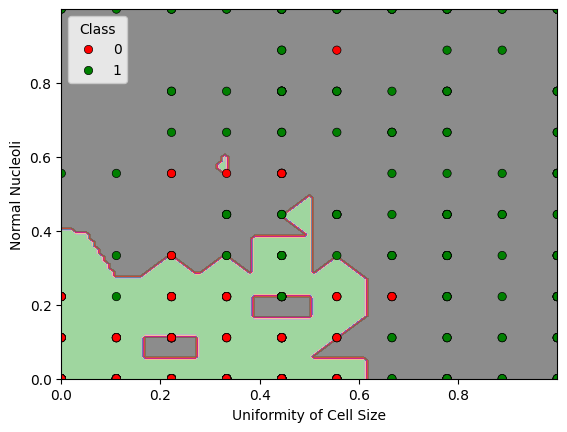

In [102]:
#Visualizing the training result
plt.contourf(xx, x2x2, Z.reshape(xx.shape), alpha = 0.75, cmap = plt.cm.Accent)
#Plotting the training points
sns.scatterplot(
       x=x_scaled[:, 0],
        y=x_scaled[:, 1],
        hue=y,
        palette=['red', 'green'],
        alpha=1.0,
        edgecolor="black",
    )
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Normal Nucleoli')
plt.xticks(np.arange(0, 1, step=0.2))
plt.yticks(np.arange(0, 1, step=0.2))
plt.show()

In [103]:
#Performing Cross-Validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=60, stratify=y)
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_predicted = classifier.predict(x_test)
cv_scores=cross_val_score(classifier, x_scaled, y, cv=10, scoring='accuracy')
print('Mean of Cross-Validated Scores: ' + str(cv_scores.mean()))
print('Accuracy Score: ' + str(accuracy_score(y_test, y_predicted)))

Mean of Cross-Validated Scores: 0.8984679089026916
Accuracy Score: 0.9142857142857143


In [104]:
#Creating a list of k-values
k_values = []
for i in range(1, 16):
    if i%2 !=0:
        k_values.append(i)
print(k_values)

[1, 3, 5, 7, 9, 11, 13, 15]


In [105]:
#Finding the optimal k-values
k_accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean())
#Using a DataFrame to save k-values vs. each accuracy score
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy'])
print(df_k_scores)

      k  accuracy
0   1.0  0.899917
1   3.0  0.915652
2   5.0  0.898468
3   7.0  0.922733
4   9.0  0.929917
5  11.0  0.925631
6  13.0  0.929917
7  15.0  0.928489


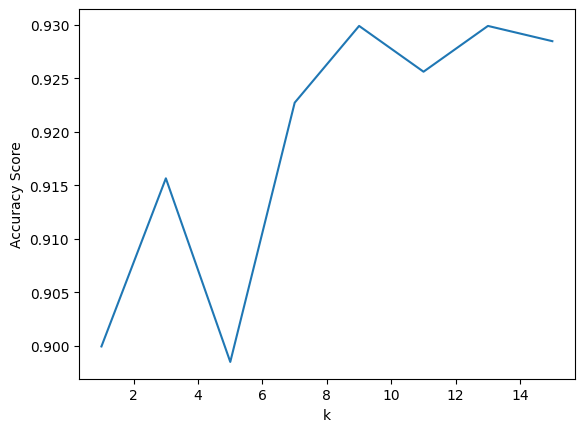

In [106]:
#Plotting the k-values and accuracy scores
plt.plot(k_values, k_accuracy_scores)
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.show()

Conclusion:

After using both a Logistic Regression Model and a K-Nearest-Neighbor test, it is apparent that the Logistic Regression Model is better suited to be used for this particular dataset. This is mostly becaues accuracy score from the Logistic Regression Model of 0.96 is much higher than the accuracy score of 0.89 from the KNN test.